# Notebook 2 – Exploratory Data Analysis (EDA) & Feature Engineering

## Objective
This notebook aims to explore the cleaned GDP dataset in order to identify key trends, patterns, and relationships between countries and years.  
We will perform statistical summaries, visual inspections, and create additional derived features that may help explain economic growth dynamics.

## Main Goals
- Load the cleaned dataset (`GDP_cleaned_long.csv`)
- Conduct exploratory data analysis (EDA)
  - Examine distributions, outliers, and correlations
  - Visualize GDP evolution by country and region
- Perform feature engineering for analytical insights
  - Add growth rate and average annual change
- Prepare the dataset for the visualization notebook (Notebook 3)

---


# 📘Table of Contents

1. [Data Loading and Basic Overview](#data-loading-and-basic-overview)  
2. [Descriptive EDA (Statistical Exploration)](#descriptive-eda-statistical-exploration)  
3. [Handling Missing Values & Feature Engineering](#handling-missing-values--feature-engineering)  
4. [Visual EDA (Distributions and Global Trends)](#visual-eda-distributions-and-global-trends)  
5. [Regional / Comparative Analysis and Correlations](#regional--comparative-analysis-and-correlations)  
6. [EDA Summary & Handover to Notebook 3](#eda-summary--handover-to-notebook-3)

<a id="data-loading-and-basic-overview"></a>
## Data Loading and Basic Overview

In this step, we will:
- Load the cleaned dataset `GDP_cleaned_long.csv`
- Display its structure (rows, columns, dtypes)
- Show the first few rows
- Check for missing values and duplicates  
This helps confirm that the dataset is clean and ready for exploratory analysis.


In [4]:
# Step 2 – Data Loading and Basic Overview

import pandas as pd

# Load the cleaned dataset
file_path = "daten/GDP_cleaned_long.csv"
gdp_df = pd.read_csv(file_path)

# Display basic information
print("Shape of dataset:", gdp_df.shape)
print("\nData types:")
print(gdp_df.dtypes)

# Show first 5 rows
display(gdp_df.head())

# Check for missing values
print("\nMissing values per column:")
print(gdp_df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", gdp_df.duplicated().sum())


Shape of dataset: (4116, 3)

Data types:
Country     object
Year         int64
GDP        float64
dtype: object


,Country,Year,GDP
0,Afghanistan,2005,6167.0
1,Albania,2005,8148.0
2,Algeria,2005,107047.0
3,Andorra,2005,3158.0
4,Angola,2005,41397.0



Missing values per column:
Country     0
Year        0
GDP        38
dtype: int64

Number of duplicate rows: 0


 <a id="descriptive-eda-statistical-exploration"></a>
## Descriptive EDA (Statistical Exploration)


In this step, we will:
- Examine the overall statistical properties of GDP values
- Identify the range, mean, and variation of GDP across countries and years
- Explore unique counts for categorical columns
- Summarize the number of countries and time period covered

This statistical overview provides a foundation for further visual analysis.


In [6]:
# Step 3 – Descriptive EDA (Improved formatting)

# Format GDP values for readability
pd.options.display.float_format = '{:,.2f}'.format

# Statistical summary
gdp_stats = gdp_df['GDP'].describe()
print("Statistical summary of GDP:\n")
print(gdp_stats)

# Unique counts and range
num_countries = gdp_df['Country'].nunique()
years_range = (gdp_df['Year'].min(), gdp_df['Year'].max())

print(f"\nNumber of unique countries: {num_countries}")
print(f"Time period covered: {years_range[0]}–{years_range[1]}")

# Top and bottom 5 by average GDP
print("\nTop 5 countries by average GDP:")
display(
    gdp_df.groupby('Country', as_index=False)['GDP']
    .mean()
    .sort_values(by='GDP', ascending=False)
    .head(5)
)

print("Bottom 5 countries by average GDP:")
display(
    gdp_df.groupby('Country', as_index=False)['GDP']
    .mean()
    .sort_values(by='GDP', ascending=True)
    .head(5)
)


Statistical summary of GDP:

count        4,078.00
mean       412,771.16
std      1,788,058.06
min             23.00
25%          7,532.75
50%         31,495.00
75%        206,936.50
max     30,507,217.00
Name: GDP, dtype: float64

Number of unique countries: 196
Time period covered: 2005–2025

Top 5 countries by average GDP:


,Country,GDP
187,United States,"19,491,997.24"
36,China,"11,109,020.86"
85,Japan,"4,957,259.62"
63,Germany,"3,833,331.81"
186,United Kingdom,"2,919,347.00"


Bottom 5 countries by average GDP:


,Country,GDP
182,Tuvalu,43.76
119,Nauru,97.62
108,Marshall Islands,202.76
89,Kiribati,208.95
130,Palau,244.00


<a id="handling-missing-values--feature-engineering"></a>
## Handling Missing Values & Feature Engineering


In this step, we will:
- Handle 38 missing GDP values by linear interpolation per country
- Create a new feature called `GDP_Growth_Rate`, representing the year-over-year percentage change in GDP
- Verify the new column for logical consistency

This step enhances the dataset by filling small gaps and adding a dynamic measure of economic performance.


In [7]:
# Step 4 – Handle Missing Values & Create GDP_Growth_Rate

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# 1) Sort for time-wise operations
gdp_df = gdp_df.sort_values(['Country', 'Year']).reset_index(drop=True)

# 2) Interpolate missing GDP per country (linear, both directions for edge NaNs)
missing_before = gdp_df['GDP'].isna().sum()
gdp_df['GDP'] = (
    gdp_df.groupby('Country', group_keys=False)['GDP']
          .apply(lambda s: s.interpolate(method='linear', limit_direction='both'))
)
missing_after = gdp_df['GDP'].isna().sum()

print(f"Missing GDP before: {missing_before}, after interpolation: {missing_after}")

# 3) Feature: year-over-year percentage change within each country
gdp_df['GDP_Growth_Rate'] = (
    gdp_df.groupby('Country', group_keys=False)['GDP']
          .pct_change() * 100.0
)

# 4) Quick sanity checks
print("\nGDP_Growth_Rate summary:")
print(gdp_df['GDP_Growth_Rate'].describe())

print("\nSample (5 rows) after feature creation:")
display(gdp_df.head(5))

# Note: The first year per country has NaN growth (no prior year) — this is expected.


Missing GDP before: 38, after interpolation: 0

GDP_Growth_Rate summary:
count   3,920.00
mean        6.10
std        12.19
min       -84.22
25%         0.00
50%         5.85
75%        11.99
max       106.37
Name: GDP_Growth_Rate, dtype: float64

Sample (5 rows) after feature creation:


,Country,Year,GDP,GDP_Growth_Rate
0,Afghanistan,2005,"6,167.00",NaN
1,Afghanistan,2006,"6,925.00",12.29
2,Afghanistan,2007,"8,556.00",23.55
3,Afghanistan,2008,"10,297.00",20.35
4,Afghanistan,2009,"12,066.00",17.18


<a id="visual-eda-distributions-and-global-trends"></a>
## Visual EDA (Distributions and Global Trends)


In this step, we will:
- Visualize the overall GDP distribution
- Explore the GDP growth rate distribution
- Display global GDP evolution over time
- Identify top and bottom countries by GDP visually

These visualizations help us understand the range, shape, and key patterns in the dataset before we move to detailed analysis.


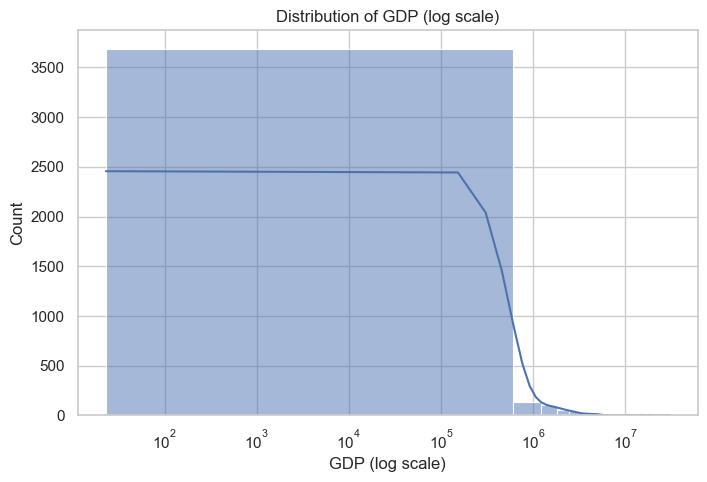

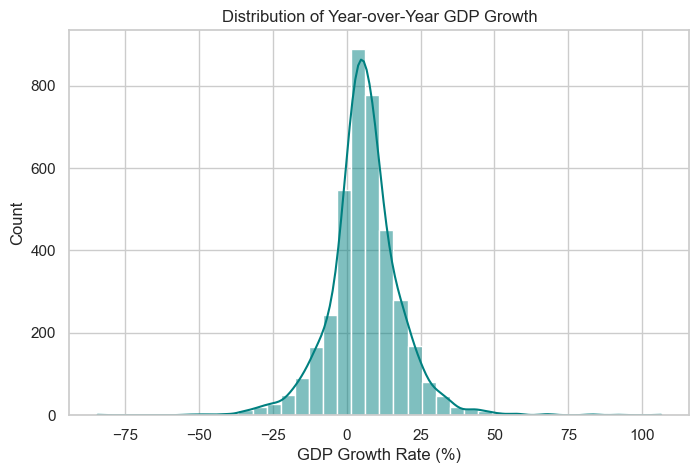

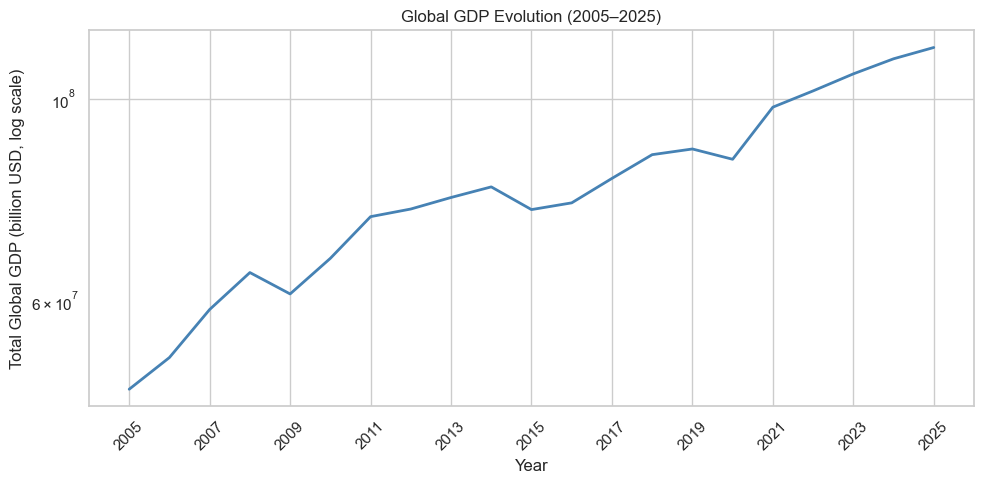

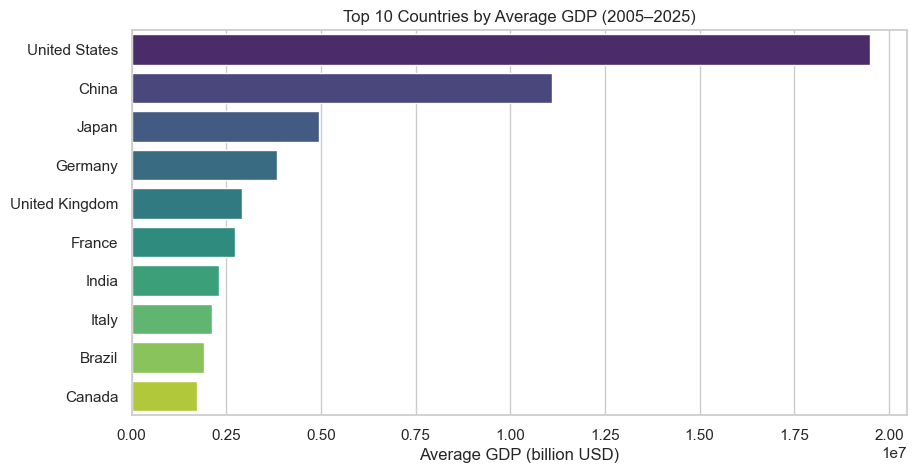

In [10]:
# Step 5 – Visual EDA (Distributions and Global Trends)

import matplotlib.pyplot as plt
import seaborn as sns

# General style
plt.style.use('default')
sns.set_theme(style='whitegrid')

# 1) Histogram of GDP (log scale due to large variation)
plt.figure(figsize=(8, 5))
sns.histplot(gdp_df['GDP'], bins=50, kde=True)
plt.xscale('log')
plt.xlabel('GDP (log scale)')
plt.title('Distribution of GDP (log scale)')
plt.show()

# 2) Distribution of GDP Growth Rate
plt.figure(figsize=(8, 5))
sns.histplot(gdp_df['GDP_Growth_Rate'].dropna(), bins=40, kde=True, color='teal')
plt.xlabel('GDP Growth Rate (%)')
plt.title('Distribution of Year-over-Year GDP Growth')
plt.show()

# 3) Global GDP Trend (sum of all countries per year) – improved axis formatting
import matplotlib.ticker as mticker

global_gdp = gdp_df.groupby('Year', as_index=False)['GDP'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(data=global_gdp, x='Year', y='GDP', linewidth=2, color='steelblue')
plt.title('Global GDP Evolution (2005–2025)')
plt.ylabel('Total Global GDP (billion USD, log scale)')
plt.yscale('log')

# make X axis show integer years only
plt.xticks(
    ticks=range(global_gdp['Year'].min(), global_gdp['Year'].max() + 1, 2),
    rotation=45
)
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
plt.xlabel('Year')

plt.tight_layout()
plt.show()

# 4) Top 10 countries by average GDP – bar chart (fixed warning)
top10 = (
    gdp_df.groupby('Country', as_index=False)['GDP']
    .mean()
    .sort_values(by='GDP', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top10,
    x='GDP',
    y='Country',
    hue='Country',
    palette='viridis',
    legend=False
)
plt.title('Top 10 Countries by Average GDP (2005–2025)')
plt.xlabel('Average GDP (billion USD)')
plt.ylabel('')
plt.show()

<a id="regional--comparative-analysis-and-correlations"></a>
## Regional / Comparative Analysis and Correlations


In this step, we will:
- Compare GDP growth across selected major economies  
- Examine correlations between GDP levels and growth rates  
- Visualize how countries differ in their growth dynamics  

These comparisons help highlight economic divergence and global interdependence.


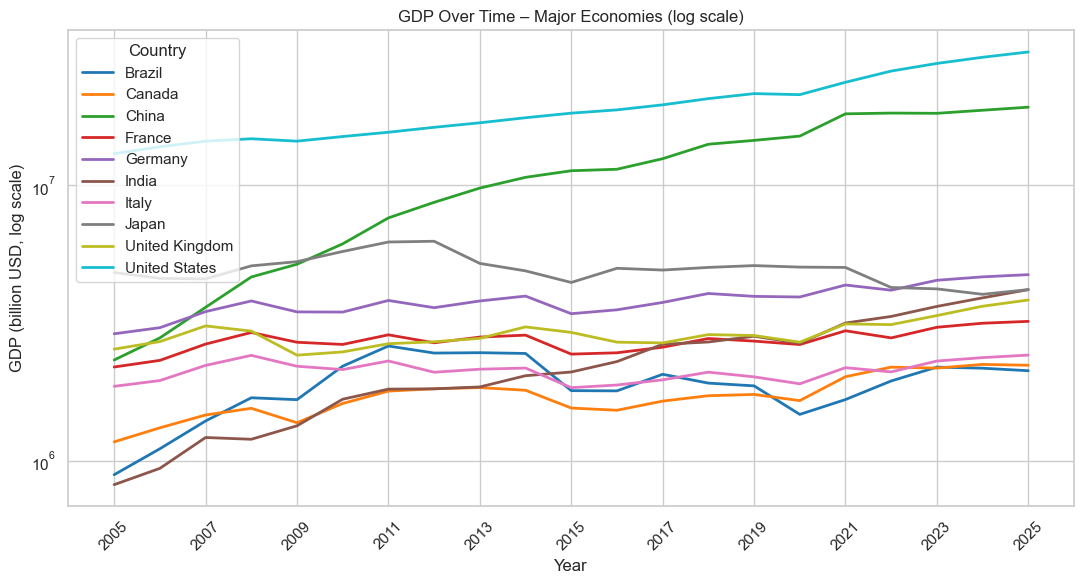

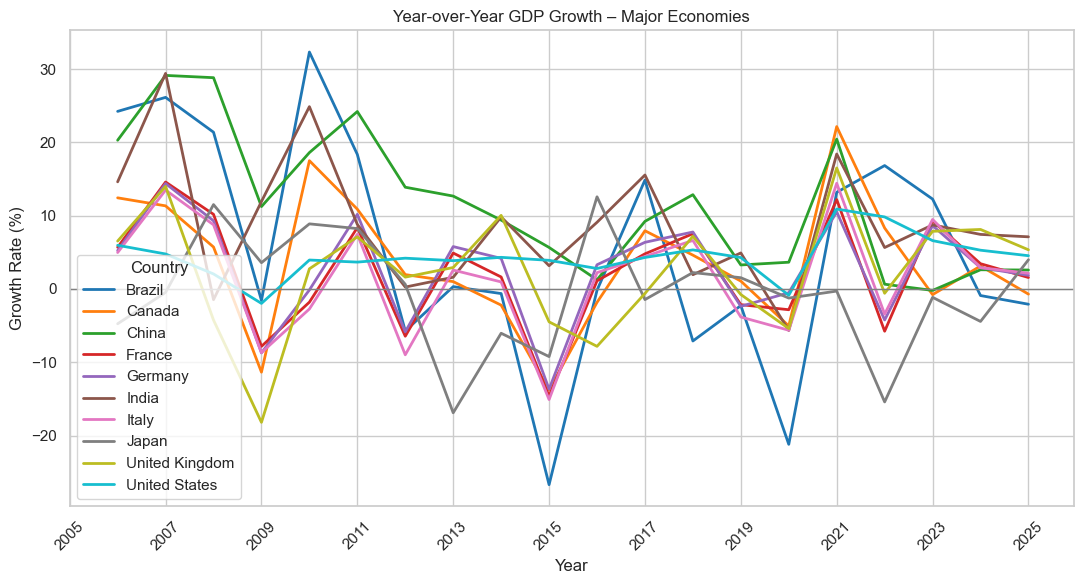

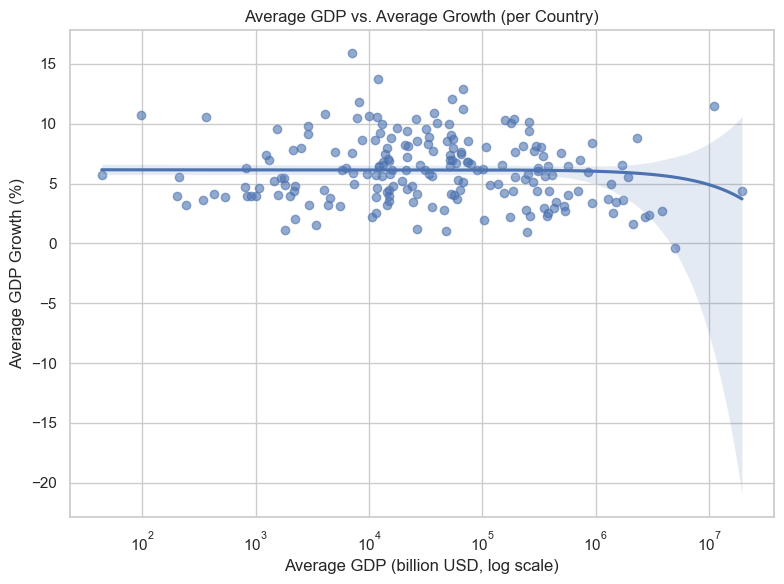

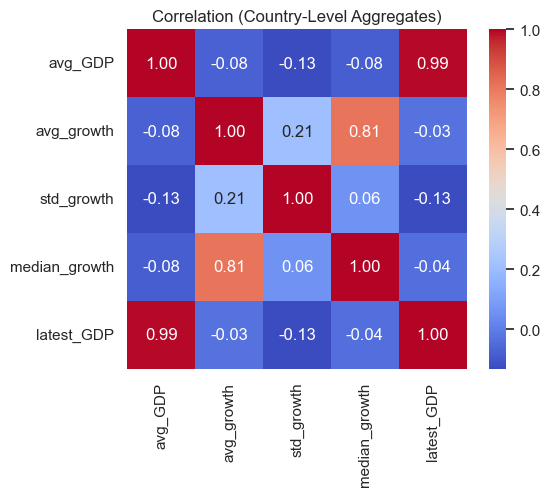

,Country,avg_GDP,avg_growth,std_growth,median_growth
187,United States,"19,491,997.24",4.38,2.89,4.28
36,China,"11,109,020.86",11.51,9.40,10.31
85,Japan,"4,957,259.62",-0.41,7.82,-0.39
63,Germany,"3,833,331.81",2.74,7.09,3.73
186,United Kingdom,"2,919,347.00",2.39,8.06,2.83
59,France,"2,739,047.19",2.19,7.42,2.53
76,India,"2,297,692.67",8.81,8.63,8.09
82,Italy,"2,126,969.00",1.60,7.69,2.40
24,Brazil,"1,905,401.00",5.57,15.52,0.06
31,Canada,"1,737,796.05",3.61,8.86,2.54


In [11]:
# Step 6 – Regional / Comparative Analysis and Correlations

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd

sns.set_theme(style='whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

# 0) Select major economies present in the dataset
major_candidates = [
    "United States", "China", "Japan", "Germany", "United Kingdom",
    "India", "France", "Italy", "Brazil", "Canada"
]
available = set(gdp_df['Country'].unique())
majors = [c for c in major_candidates if c in available]

major_df = gdp_df[gdp_df['Country'].isin(majors)].copy()

# 1) GDP (level) over time for major economies
plt.figure(figsize=(11, 6))
sns.lineplot(
    data=major_df,
    x='Year', y='GDP',
    hue='Country',  # hue required because palette is used
    palette='tab10',
    linewidth=2
)
plt.yscale('log')
plt.title('GDP Over Time – Major Economies (log scale)')
plt.ylabel('GDP (billion USD, log scale)')
plt.xlabel('Year')
plt.xticks(
    ticks=range(int(major_df['Year'].min()), int(major_df['Year'].max()) + 1, 2),
    rotation=45
)
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
plt.tight_layout()
plt.show()

# 2) GDP Growth Rate over time for major economies
plt.figure(figsize=(11, 6))
sns.lineplot(
    data=major_df.dropna(subset=['GDP_Growth_Rate']),
    x='Year', y='GDP_Growth_Rate',
    hue='Country',
    palette='tab10',
    linewidth=2
)
plt.axhline(0, color='gray', linewidth=1)
plt.title('Year-over-Year GDP Growth – Major Economies')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.xticks(
    ticks=range(int(major_df['Year'].min()), int(major_df['Year'].max()) + 1, 2),
    rotation=45
)
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
plt.tight_layout()
plt.show()

# 3) Country-level aggregates: average GDP vs average growth (scatter with regression)
agg = (
    gdp_df.groupby('Country', as_index=False)
    .agg(avg_GDP=('GDP', 'mean'),
         avg_growth=('GDP_Growth_Rate', 'mean'),
         std_growth=('GDP_Growth_Rate', 'std'),
         median_growth=('GDP_Growth_Rate', 'median'),
         latest_GDP=('GDP', lambda s: s.iloc[-1]))
)

plt.figure(figsize=(8, 6))
sns.regplot(
    data=agg.dropna(subset=['avg_GDP', 'avg_growth']),
    x='avg_GDP', y='avg_growth',
    scatter_kws={'alpha': 0.6}
)
plt.xscale('log')
plt.title('Average GDP vs. Average Growth (per Country)')
plt.xlabel('Average GDP (billion USD, log scale)')
plt.ylabel('Average GDP Growth (%)')
plt.tight_layout()
plt.show()

# 4) Correlation heatmap between aggregated country metrics
corr_vars = ['avg_GDP', 'avg_growth', 'std_growth', 'median_growth', 'latest_GDP']
corr_mat = agg[corr_vars].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_mat, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation (Country-Level Aggregates)')
plt.tight_layout()
plt.show()

# Optional: show the top of the aggregates table for quick inspection
display(
    agg.sort_values('avg_GDP', ascending=False)
       .head(10)
       .loc[:, ['Country', 'avg_GDP', 'avg_growth', 'std_growth', 'median_growth']]
)


<a id="eda-summary--handover-to-notebook-3"></a>
## EDA Summary & Handover to Notebook 3

### 🧭 Key Findings
- Dataset covers **196 countries (2005–2025)** after cleaning and interpolation — no missing values remain.  
- **Global GDP** shows a steady upward trajectory, with clear acceleration after **2010**, driven mainly by **China** and the **United States**.  
- GDP distribution is **highly right-skewed** — log-scale visualization proved essential for meaningful insights.  
- **Average annual growth ≈ 6 %**, but with strong cross-country variation (ranging from −80 % to +100 %).  
- **Major economies** (US, China, Japan, Germany, UK) dominate global GDP, while smaller economies exhibit greater volatility.  
- **Correlation analysis** indicates:
  - Higher GDP levels are associated with **lower relative growth volatility**.  
  - Strong **positive correlation** exists between recent GDP and long-term average GDP.  

---

### 🚀 Next Steps
In **Notebook 3 – Visualization & Insights**, we will:
- Develop **interactive dashboards** using **Plotly Dash / Plotly Express** directly inside Jupyter.  
- Explore **temporal and geographic GDP trends** interactively across countries and regions.  
- Enable **country-level comparisons**, highlighting **top / bottom performers** and **growth anomalies**.  
- Provide **final analytical conclusions (Fazit)** summarizing the global economic patterns observed.

---

✅ *Notebook 2 completed – dataset fully prepared for advanced visualization and insight generation in Notebook 3.*
